# Looking at International FIS (2monthurea/2monthUAN) 

#### I have the framework so if there is any addition of dates it shouldn't be too hard and if there are any x variables you would like to have added besides just the spot dollar index

In [51]:
import pandas as pd

original = pd.read_csv("C:/Users/msteinme/Documents/InternationalUrea.csv")
print (original.shape)
original.head()

(187, 8)


,Date,Dollar,UreaPrillYuz,UreaGranEast,UANRouen,UreaPrillChina,UreaGranEgypt,UreaGranBrazil
0,6/13/2014,80.576,301,317,183,250,344,NaN
1,6/16/2014,80.471,301,315,183,250,340,NaN
2,6/17/2014,80.629,301,316,183,250,335,NaN
3,6/18/2014,80.584,300,315,186,247,332,NaN
4,6/19/2014,80.317,300,315,186,247,330,NaN


<function matplotlib.pyplot.show>

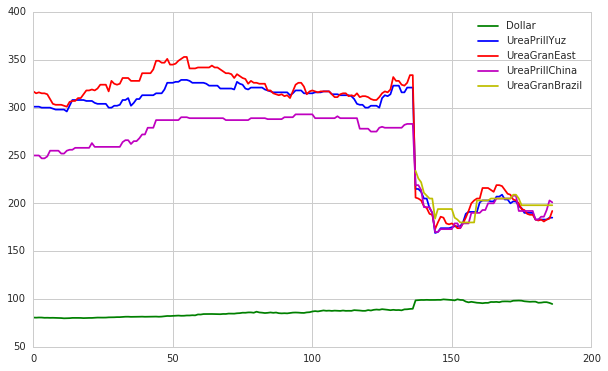

In [79]:
#comparing different countries urea trends
y1 = (original['Dollar'])
y2 = (original['UreaPrillYuz'])
y3 = (original['UreaGranEast'])
y4 = (original['UreaPrillChina'])
y5 = (original['UreaGranBrazil'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
ax.plot(y3,'r')
ax.plot(y4,'m')
ax.plot(y5,'y')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

## Urea Prill Yuz

#### Keeping all of Yuz dates both 2014 and 2016 then I will later separate 

In [142]:
yuz = original[['Date','Dollar','UreaPrillYuz']]
yuz.shape

(187, 3)

In [143]:
yuz.describe()

,Dollar,UreaPrillYuz
count,187.000000,187.000000
mean,87.798802,280.871658
std,6.537041,54.819102
min,79.775000,169.000000
25%,81.739500,210.500000
50%,85.912000,308.000000
75%,95.889000,317.500000
max,99.606000,329.000000


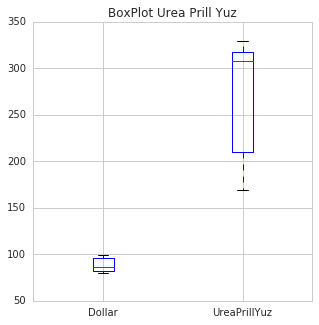

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show(yuz.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Prill Yuz')))

<function matplotlib.pyplot.show>

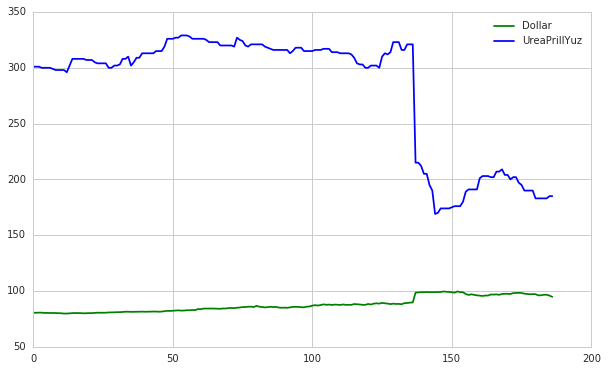

In [144]:
x1 = (yuz['Date'])
y1 = (yuz['Dollar'])
y2 = (yuz['UreaPrillYuz'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [145]:
yuz.corr()

,Dollar,UreaPrillYuz
Dollar,1.000000,-0.879648
UreaPrillYuz,-0.879648,1.000000


In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = yuz[['Dollar']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     632.8
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           1.31e-61
Time:                        10:36:17   Log-Likelihood:                -874.63
No. Observations:                 187   AIC:                             1753.
Df Residuals:                     185   BIC:                             1760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        928.5333     25.817     35.965      0.000       877.599   979.468
Dollar        -7.3767      0.293    -25.155      0.000        -7.955    -6.798
==============================================================================
Omnibus:                      142.006   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.069
Skew:                           0.076   Prob(JB):                      0.00145
Kurtosis:                       1.714   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


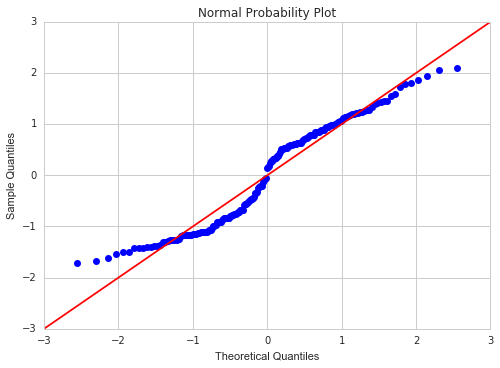

In [12]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=yuz[['Dollar']].values
y=yuz['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=200, criterion='mse',random_state=1,max_depth=10, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 11.935, test: 60.280
R^2 train: 0.996, test: 0.977


In [32]:
#do a few times to see which model parameters are the best overall
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [35]:
rdf_model_yuz = fit_predict_model(X_train,y_train)
print (rdf_model_yuz.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [36]:
#suggested parameters model for yuz
X=yuz[['Dollar']].values
y=yuz['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 25.645, test: 55.395
R^2 train: 0.992, test: 0.979


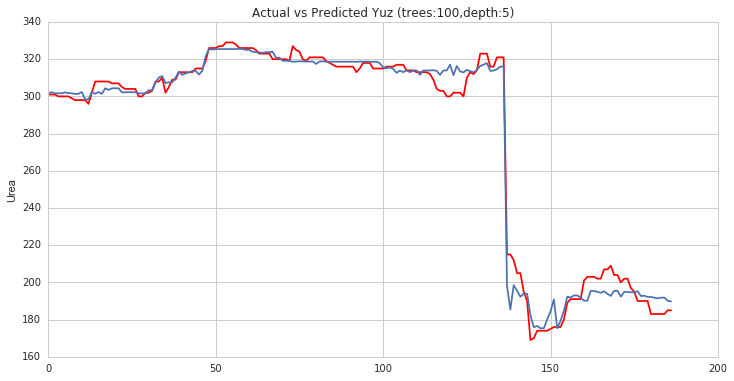

In [43]:
#actual vs predicted
yuzx = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted Yuz (trees:100,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(yuzx)

#### Yuz 2016 on since there is a gap (no 2015)

In [151]:
yuz_part = original[['Date','Dollar','UreaPrillYuz']][137:187]
print(yuz_part.shape)
yuz_part.describe()

(50, 3)


,Dollar,UreaPrillYuz
count,50.000000,50.000000
mean,97.625200,191.880000
std,1.256521,12.632385
min,94.760000,169.000000
25%,96.626250,183.000000
50%,97.418500,191.000000
75%,98.925250,202.750000
max,99.606000,215.000000


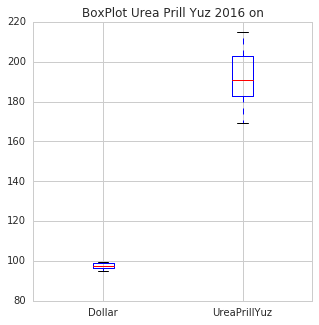

In [157]:
plt.show(yuz_part.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Prill Yuz 2016 on')))

In [154]:
yuz_part.corr() #no point of going on don't see any correlation

,Dollar,UreaPrillYuz
Dollar,1.000000,-0.254251
UreaPrillYuz,-0.254251,1.000000


## Urea Gran M East

In [52]:
east = original[['Date','Dollar','UreaGranEast']]
print(east.shape)
east.describe()

(187, 3)


,Dollar,UreaGranEast
count,187.000000,187.000000
mean,87.798802,289.647059
std,6.537041,58.875607
min,79.775000,173.000000
25%,81.739500,217.000000
50%,85.912000,315.000000
75%,95.889000,328.000000
max,99.606000,353.000000


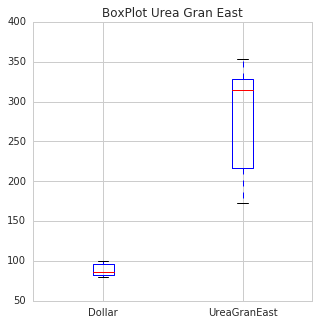

In [53]:
plt.show(east.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Gran East')))

<function matplotlib.pyplot.show>

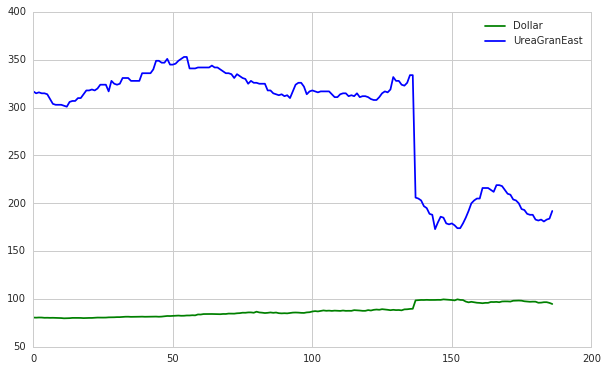

In [54]:
y1 = (east['Dollar'])
y2 = (east['UreaGranEast'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [55]:
east.corr()

,Dollar,UreaGranEast
Dollar,1.00000,-0.90215
UreaGranEast,-0.90215,1.00000


In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = east[['Dollar']]
Y = east[['UreaGranEast']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaGranEast   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     808.9
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           1.86e-69
Time:                        10:56:35   Log-Likelihood:                -869.74
No. Observations:                 187   AIC:                             1743.
Df Residuals:                     185   BIC:                             1750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1003.0277     25.151     39.880      0.000       953.408  1052.647
Dollar        -8.1252      0.286    -28.442      0.000        -8.689    -7.562
==============================================================================
Omnibus:                       14.628   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.266
Skew:                          -0.190   Prob(JB):                       0.0436
Kurtosis:                       2.188   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


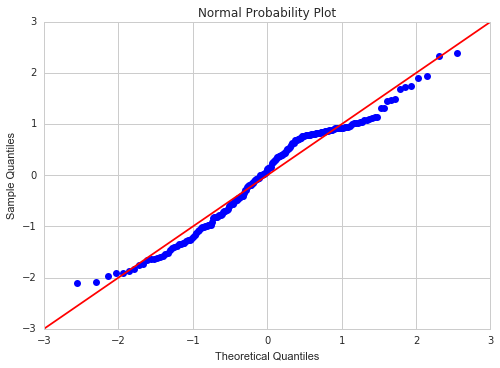

In [57]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=east[['Dollar']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=200, criterion='mse',random_state=1,max_depth=10, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 12.709, test: 85.684
R^2 train: 0.997, test: 0.971


In [59]:
#do a few times to see which model parameters are the best overall
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [62]:
rdf_model_east = fit_predict_model(X_train,y_train)
print (rdf_model_east.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [63]:
#Middle east suggested parameters model 
X=east[['Dollar']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 24.205, test: 73.455
R^2 train: 0.993, test: 0.976


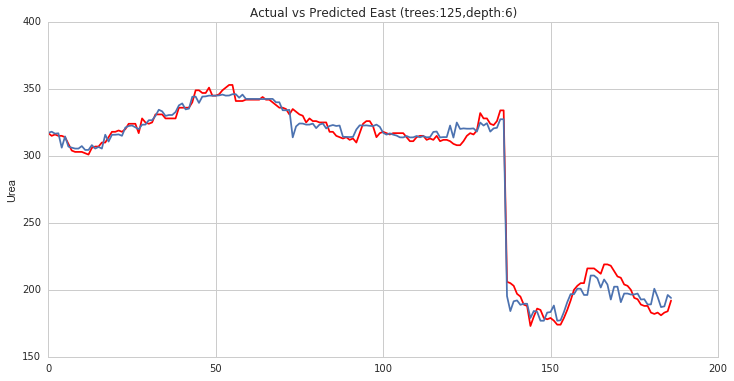

In [64]:
#actual vs predicted
eastx = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted East (trees:125,depth:6)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(eastx)

#### East 2016 on since there is a gap (no 2015)

In [155]:
east_part = original[['Date','Dollar','UreaGranEast']][137:187]
print(east_part.shape)
east_part.describe()

(50, 3)


,Dollar,UreaGranEast
count,50.000000,50.000000
mean,97.625200,194.940000
std,1.256521,13.994766
min,94.760000,173.000000
25%,96.626250,183.000000
50%,97.418500,192.500000
75%,98.925250,205.000000
max,99.606000,219.000000


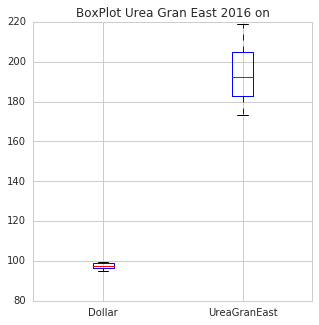

In [156]:
plt.show(east_part.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Gran East 2016 on')))

In [158]:
east_part.corr() #still no correlation so not going any further

,Dollar,UreaGranEast
Dollar,1.000000,-0.424469
UreaGranEast,-0.424469,1.000000


## Urea Prill China

In [102]:
china = original[['Date','Dollar','UreaPrillChina']]
print(china.shape)
china.describe()

(187, 3)


,Dollar,UreaPrillChina
count,187.000000,187.000000
mean,87.798802,254.957219
std,6.537041,40.703733
min,79.775000,170.000000
25%,81.739500,211.000000
50%,85.912000,275.000000
75%,95.889000,289.000000
max,99.606000,293.000000


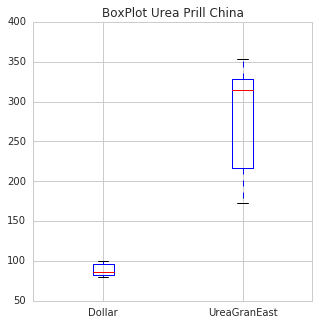

In [103]:
plt.show(east.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Prill China')))

<function matplotlib.pyplot.show>

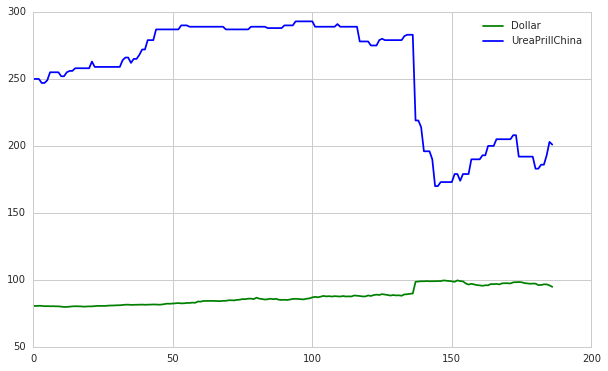

In [104]:
y1 = (china['Dollar'])
y2 = (china['UreaPrillChina'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [105]:
china.corr()

,Dollar,UreaPrillChina
Dollar,1.000000,-0.782539
UreaPrillChina,-0.782539,1.000000


In [106]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = china[['Dollar']]
Y = china[['UreaPrillChina']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaPrillChina   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     292.3
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           6.33e-40
Time:                        11:46:36   Log-Likelihood:                -869.31
No. Observations:                 187   AIC:                             1743.
Df Residuals:                     185   BIC:                             1749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        682.7640     25.093     27.209      0.000       633.258   732.270
Dollar        -4.8726      0.285    -17.095      0.000        -5.435    -4.310
==============================================================================
Omnibus:                     1600.708   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.567
Skew:                          -0.145   Prob(JB):                     0.000153
Kurtosis:                       1.527   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


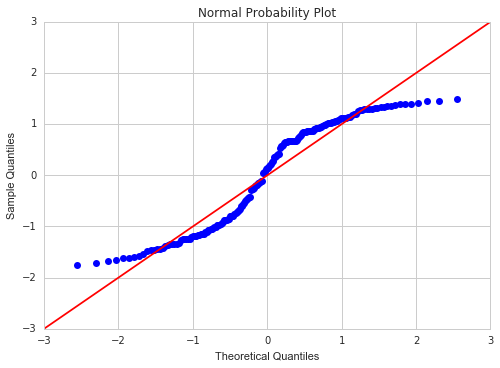

In [107]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [68]:
X=china[['Dollar']].values
y=china['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(130, 1)

In [69]:
#do a few times to see which model parameters are the best overall
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [73]:
rdf_model_china = fit_predict_model(X_train,y_train)
print (rdf_model_china.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [74]:
#china suggested parameters model
X=china[['Dollar']].values
y=china['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 21.032, test: 49.916
R^2 train: 0.988, test: 0.967


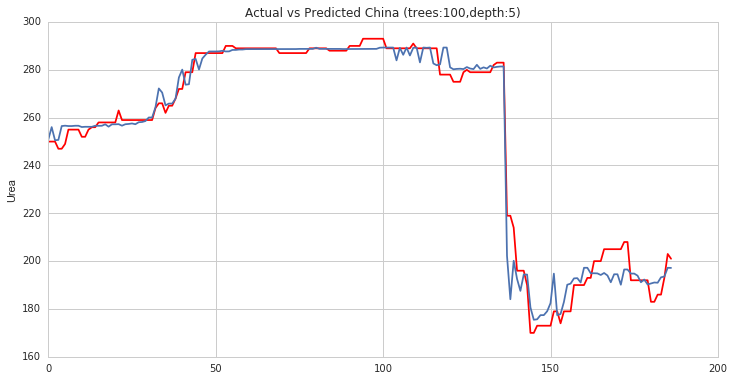

In [75]:
#actual vs predicted
chinax = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted China (trees:100,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(chinax)

#### China 2016 on since there is a gap (no 2015)

In [159]:
china_part = original[['Date','Dollar','UreaPrillChina']][137:187]
print(china_part.shape)
china_part.describe()

(50, 3)


,Dollar,UreaPrillChina
count,50.000000,50.000000
mean,97.625200,191.660000
std,1.256521,12.859698
min,94.760000,170.000000
25%,96.626250,180.000000
50%,97.418500,192.000000
75%,98.925250,200.750000
max,99.606000,219.000000


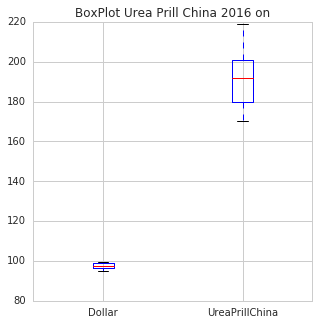

In [161]:
plt.show(china_part.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Prill China 2016 on')))

In [162]:
china_part.corr() #no apparent correlation so will stop

,Dollar,UreaPrillChina
Dollar,1.000000,-0.280214
UreaPrillChina,-0.280214,1.000000


## Urea Gran Egypt

In [108]:
egypt = original[['Date','Dollar','UreaGranEgypt']]
print(egypt.shape)
egypt.describe()

(187, 3)


,Dollar,UreaGranEgypt
count,187.000000,187.000000
mean,87.798802,316.791444
std,6.537041,63.521433
min,79.775000,195.000000
25%,81.739500,232.500000
50%,85.912000,348.000000
75%,95.889000,357.500000
max,99.606000,393.000000


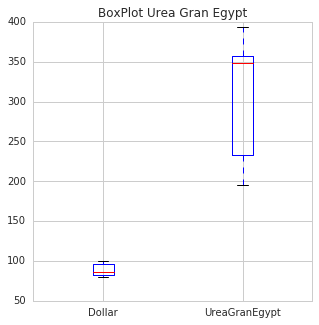

In [109]:
plt.show(egypt.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Gran Egypt')))

<function matplotlib.pyplot.show>

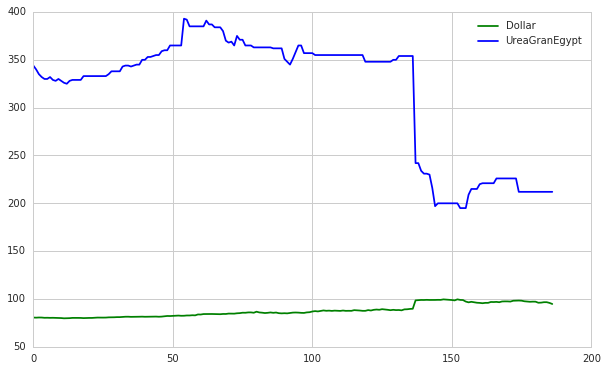

In [110]:
y1 = (egypt['Dollar'])
y2 = (egypt['UreaGranEgypt'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [111]:
egypt.corr()

,Dollar,UreaGranEgypt
Dollar,1.000000,-0.852067
UreaGranEgypt,-0.852067,1.000000


In [112]:
X = egypt[['Dollar']]
Y = egypt[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     490.2
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           6.69e-54
Time:                        11:49:10   Log-Likelihood:                -920.09
No. Observations:                 187   AIC:                             1844.
Df Residuals:                     185   BIC:                             1851.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1043.7363     32.923     31.703      0.000       978.784  1108.689
Dollar        -8.2797      0.374    -22.141      0.000        -9.017    -7.542
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.856   Jarque-Bera (JB):               18.356
Skew:                          -0.096   Prob(JB):                     0.000103
Kurtosis:                       1.477   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


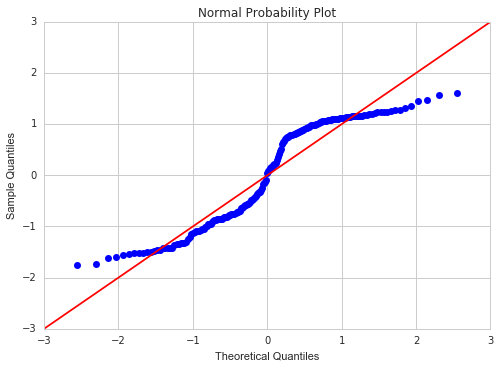

In [113]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [84]:
X=egypt[['Dollar']].values
y=egypt['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(130, 1)

In [85]:
def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [89]:
rdf_model_egypt = fit_predict_model(X_train,y_train)
print (rdf_model_egypt.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [90]:
#Best parameters model for Egypt
X=egypt[['Dollar']].values
y=egypt['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 25.703, test: 66.408
R^2 train: 0.994, test: 0.982


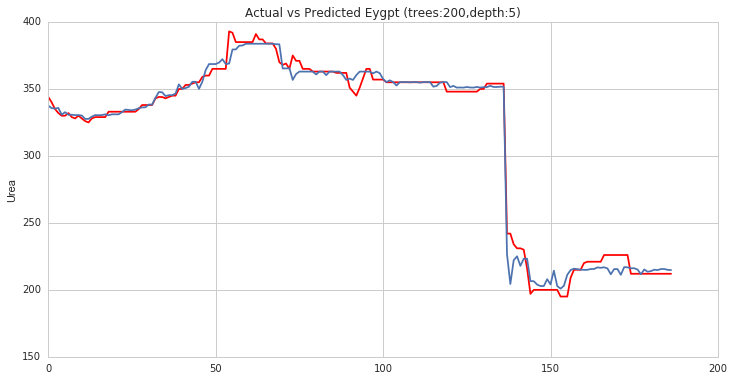

In [91]:
#actual vs predicted
egyptx = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted Eygpt (trees:200,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(egyptx)

#### Egypt 2016 on since there is a gap (no 2015)

In [163]:
egypt_part = original[['Date','Dollar','UreaGranEgypt']][137:187]
print(egypt_part.shape)
egypt_part.describe()

(50, 3)


,Dollar,UreaGranEgypt
count,50.000000,50.000000
mean,97.625200,215.020000
std,1.256521,12.127705
min,94.760000,195.000000
25%,96.626250,209.750000
50%,97.418500,212.000000
75%,98.925250,226.000000
max,99.606000,242.000000


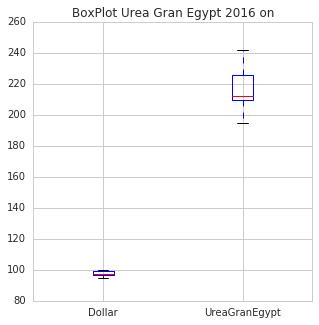

In [164]:
plt.show(egypt_part.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Gran Egypt 2016 on')))

In [165]:
egypt_part.corr() #no apparent correlation here so I will stop

,Dollar,UreaGranEgypt
Dollar,1.000000,-0.184513
UreaGranEgypt,-0.184513,1.000000


## Urea Gran Brazil

In [96]:
brazil = original[['Date','Dollar','UreaGranBrazil']]
brazil = brazil.dropna()
print(brazil.shape)
brazil.describe()

(50, 3)


,Dollar,UreaGranBrazil
count,50.000000,50.000000
mean,97.625200,199.220000
std,1.256521,11.416583
min,94.760000,180.000000
25%,96.626250,194.000000
50%,97.418500,198.000000
75%,98.925250,205.000000
max,99.606000,234.000000


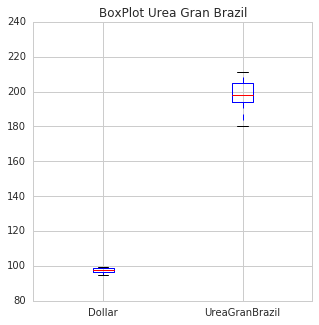

In [97]:
plt.show(brazil.plot(kind='box', figsize=(5,5),title=('BoxPlot Urea Gran Brazil')))

<function matplotlib.pyplot.show>

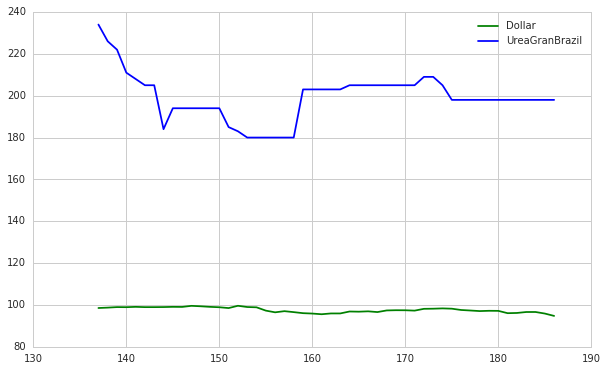

In [98]:
y1 = (brazil['Dollar'])
y2 = (brazil['UreaGranBrazil'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [114]:
brazil.corr() #the dollar clearly does not affect urea so need to find other x variables

,Dollar,UreaGranBrazil
Dollar,1.000000,0.003135
UreaGranBrazil,0.003135,1.000000


In [115]:
X = brazil[['Dollar']]
Y = brazil[['UreaGranBrazil']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaGranBrazil   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                 0.0004718
Date:                Fri, 18 Mar 2016   Prob (F-statistic):              0.983
Time:                        11:51:19   Log-Likelihood:                -192.19
No. Observations:                  50   AIC:                             388.4
Df Residuals:                      48   BIC:                             392.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        196.4390    128.039      1.534      0.132       -61.000   453.878
Dollar         0.0285      1.311      0.022      0.983        -2.608     2.665
==============================================================================
Omnibus:                        4.005   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.204
Skew:                           0.349   Prob(JB):                        0.202
Kurtosis:                       4.025   Cond. No.                     7.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


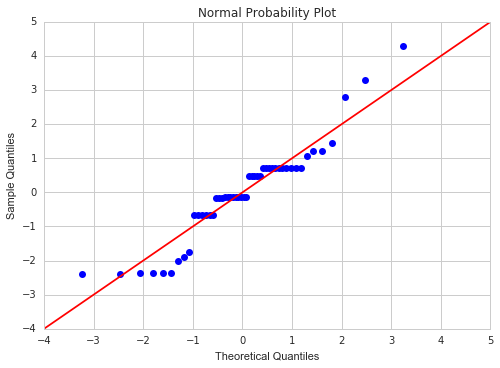

In [116]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [118]:
X=brazil[['Dollar']].values
y=brazil['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(35, 1)

In [ ]:
def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [120]:
rdf_model_brazil = fit_predict_model(X_train,y_train)
print (rdf_model_brazil.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [123]:
#Best parameters model for Brazil, #definitely don't use this model R^2 is negative, dollar has no effect on urea
X=brazil[['Dollar']].values
y=brazil['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 31.903, test: 162.216
R^2 train: 0.759, test: -0.468


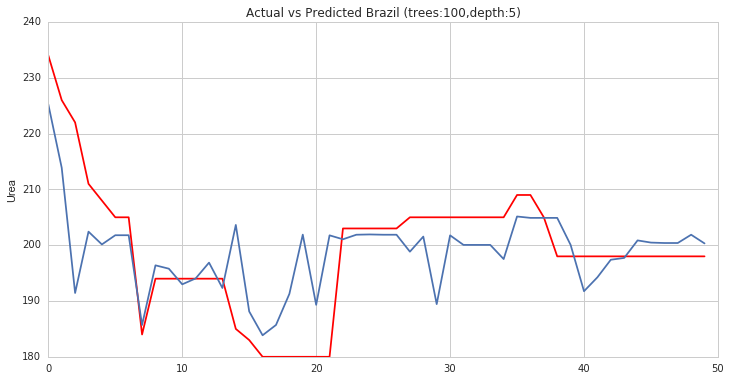

In [124]:
#actual vs predicted
brazilx = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted Brazil (trees:100,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(brazilx)

## Rouen UAN

In [125]:
rouen = original[['Date','Dollar','UANRouen']]
print(rouen.shape)
rouen.describe()

(187, 3)


,Dollar,UANRouen
count,187.000000,187.000000
mean,87.798802,185.395722
std,6.537041,21.151110
min,79.775000,149.000000
25%,81.739500,172.500000
50%,85.912000,185.000000
75%,95.889000,193.000000
max,99.606000,229.000000


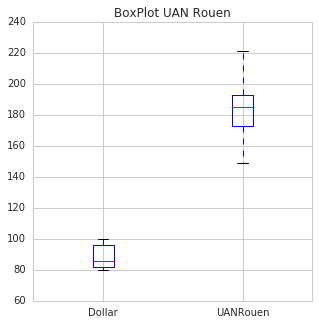

In [127]:
plt.show(rouen.plot(kind='box', figsize=(5,5),title=('BoxPlot UAN Rouen')))

<function matplotlib.pyplot.show>

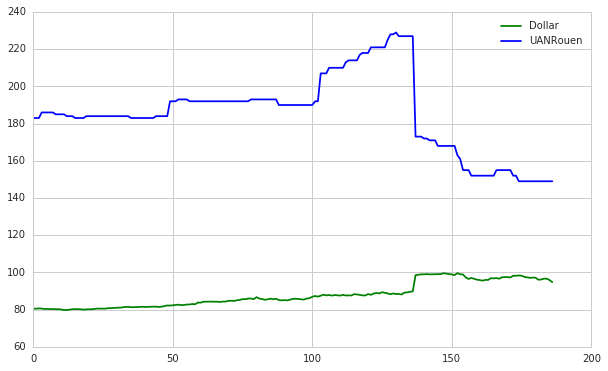

In [129]:
y1 = (rouen['Dollar'])
y2 = (rouen['UANRouen'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [126]:
rouen.corr()

,Dollar,UANRouen
Dollar,1.000000,-0.512177
UANRouen,-0.512177,1.000000


In [130]:
X = rouen[['Dollar']]
Y = rouen[['UANRouen']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UANRouen   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     65.79
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           6.75e-14
Time:                        12:05:05   Log-Likelihood:                -807.06
No. Observations:                 187   AIC:                             1618.
Df Residuals:                     185   BIC:                             1625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        330.8950     17.988     18.395      0.000       295.407   366.383
Dollar        -1.6572      0.204     -8.111      0.000        -2.060    -1.254
==============================================================================
Omnibus:                       26.782   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.438
Skew:                           1.047   Prob(JB):                     3.33e-08
Kurtosis:                       3.189   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


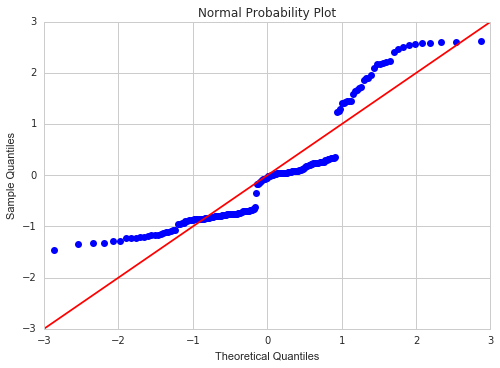

In [131]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [132]:
X=rouen[['Dollar']].values
y=rouen['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(130, 1)

In [133]:
def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [138]:
rdf_model_rouen = fit_predict_model(X_train,y_train)
print (rdf_model_rouen.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [139]:
X=rouen[['Dollar']].values
y=rouen['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 3.562, test: 11.776
R^2 train: 0.992, test: 0.975


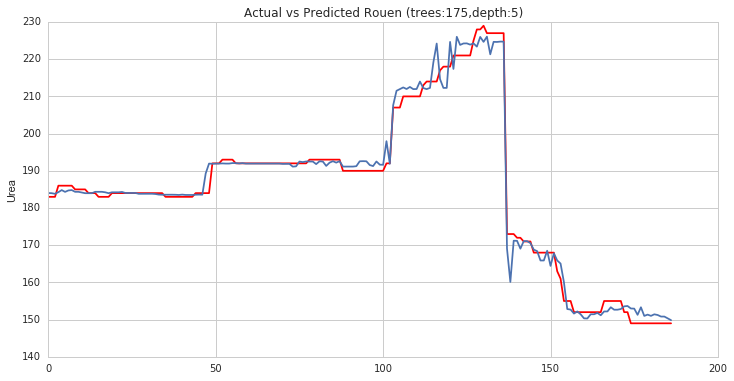

In [141]:
#actual vs predicted
rouenx = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted Rouen (trees:175,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(rouenx)

#### Rouen UAN 2016 on

In [166]:
rouen_part = original[['Date','Dollar','UANRouen']][137:187]
print(rouen_part.shape)
rouen_part.describe()

(50, 3)


,Dollar,UANRouen
count,50.000000,50.000000
mean,97.625200,157.600000
std,1.256521,8.840999
min,94.760000,149.000000
25%,96.626250,149.750000
50%,97.418500,155.000000
75%,98.925250,168.000000
max,99.606000,173.000000


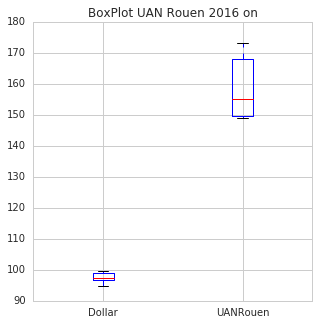

In [167]:
plt.show(rouen_part.plot(kind='box', figsize=(5,5),title=('BoxPlot UAN Rouen 2016 on')))

In [168]:
rouen_part.corr() #apparent correlation so I will continue

,Dollar,UANRouen
Dollar,1.000000,0.774648
UANRouen,0.774648,1.000000


In [169]:
X = rouen_part[['Dollar']]
Y = rouen_part[['UANRouen']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UANRouen   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     72.02
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           4.09e-11
Time:                        12:30:57   Log-Likelihood:                -156.50
No. Observations:                  50   AIC:                             317.0
Df Residuals:                      48   BIC:                             320.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -374.5060     62.704     -5.973      0.000      -500.581  -248.431
Dollar         5.4505      0.642      8.487      0.000         4.159     6.742
==============================================================================
Omnibus:                        1.711   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.600
Skew:                          -0.333   Prob(JB):                        0.449
Kurtosis:                       2.430   Cond. No.                     7.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


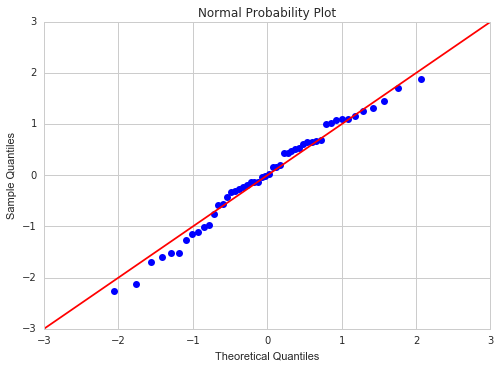

In [170]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#looks normal!
plt.title('Normal Probability Plot')
fig.show()

In [171]:
X=rouen_part[['Dollar']].values
y=rouen_part['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(35, 1)

In [172]:
def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [179]:
rdf_model_rouen_part = fit_predict_model(X_train,y_train)
print (rdf_model_rouen_part.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [180]:
X=rouen_part[['Dollar']].values
y=rouen_part['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 4.419, test: 10.013
R^2 train: 0.945, test: 0.818


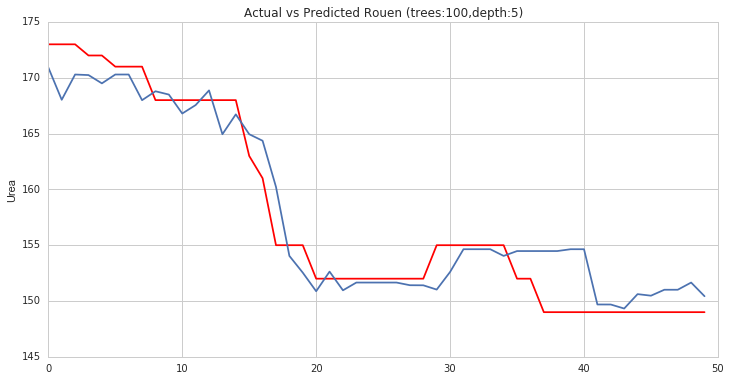

In [181]:
#actual vs predicted
rouen_partx = forest.predict(X)
plt.figure(figsize=(12,6))
plt.title("Actual vs Predicted Rouen (trees:100,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(rouen_partx)